## Практическая работа №13

#### Импорт библиотек

In [123]:
import matplotlib.pyplot as plt
import pandas as pd
import time

#### Загрузка, визуализация и преобразование данных в список

In [124]:
df = pd.read_csv('Market_Basket_Optimisation.csv')

<AxesSubplot:>

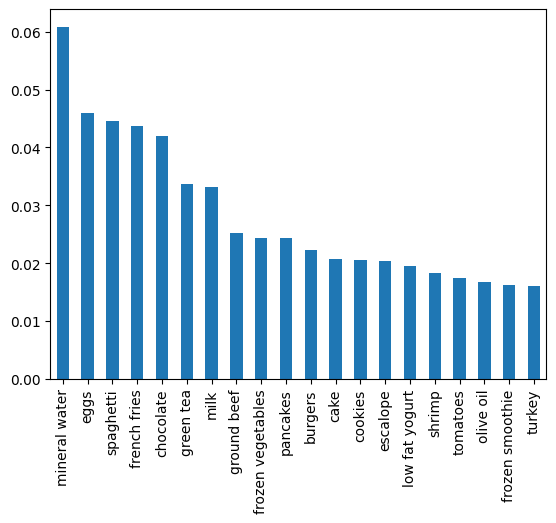

In [125]:
df.stack().value_counts(normalize=True).head(20).plot(kind='bar')

In [126]:
transactions = []

for i in range(df.shape[0]):
    row = df.iloc[i].dropna().tolist()
    transactions.append(row)

In [127]:
transactions[0]

['burgers', 'meatballs', 'eggs']

####  Работа с apriori_python

In [128]:
from apriori_python import apriori

In [129]:
t = []
start = time.perf_counter()

t1, rules = apriori(transactions, minSup=0.03, minConf=0.3)

time1 = (time.perf_counter() - start)

t.append(time1)

In [130]:
rules

[[{'chocolate'}, {'mineral water'}, 0.3213995117982099],
 [{'spaghetti'}, {'mineral water'}, 0.3430321592649311],
 [{'pancakes'}, {'mineral water'}, 0.3548387096774194],
 [{'milk'}, {'mineral water'}, 0.37037037037037035],
 [{'frozen vegetables'}, {'mineral water'}, 0.3748251748251748],
 [{'ground beef'}, {'spaghetti'}, 0.3989145183175034],
 [{'ground beef'}, {'mineral water'}, 0.41655359565807326]]

#### Работа с apyori

In [131]:
from apyori import apriori

In [132]:
start = time.perf_counter()

rules = apriori(transactions=transactions, min_support=0.03,
                min_confidence=0.3, min_lift=1.0001)

results = list(rules)

time2 = (time.perf_counter() - start)

t.append(time2)

In [133]:
results

[RelationRecord(items=frozenset({'chocolate', 'mineral water'}), support=0.05266666666666667, ordered_statistics=[OrderedStatistic(items_base=frozenset({'chocolate'}), items_add=frozenset({'mineral water'}), confidence=0.32139951179820997, lift=1.3489067367020564)]),
 RelationRecord(items=frozenset({'frozen vegetables', 'mineral water'}), support=0.03573333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'frozen vegetables'}), items_add=frozenset({'mineral water'}), confidence=0.3748251748251748, lift=1.5731330784492508)]),
 RelationRecord(items=frozenset({'mineral water', 'ground beef'}), support=0.040933333333333335, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ground beef'}), items_add=frozenset({'mineral water'}), confidence=0.41655359565807326, lift=1.7482663499919135)]),
 RelationRecord(items=frozenset({'spaghetti', 'ground beef'}), support=0.0392, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ground beef'}), items_add=frozenset({

In [134]:
#for result in results:
#    for subset in results[2]:
#        print(subset)
#        print(subset[0], subset[1])
#        print("Support: {supp}, Confidence: {conf}, Lift: {lft}" . format(result[1], subset[2], subset[3]))
#        print()

#### Работа с efficient_apriori

In [135]:
from efficient_apriori import apriori

In [136]:
start = time.perf_counter()

itemsets, rules = apriori(transactions, min_support=0.03, min_confidence=0.3)

time3 = (time.perf_counter() - start)

t.append(time3)

In [137]:
for i in range(len(rules)):
    print(rules[i])

{chocolate} -> {mineral water} (conf: 0.321, supp: 0.053, lift: 1.349, conv: 1.123)
{frozen vegetables} -> {mineral water} (conf: 0.375, supp: 0.036, lift: 1.573, conv: 1.218)
{ground beef} -> {mineral water} (conf: 0.417, supp: 0.041, lift: 1.748, conv: 1.306)
{ground beef} -> {spaghetti} (conf: 0.399, supp: 0.039, lift: 2.291, conv: 1.374)
{milk} -> {mineral water} (conf: 0.370, supp: 0.048, lift: 1.554, conv: 1.210)
{pancakes} -> {mineral water} (conf: 0.355, supp: 0.034, lift: 1.489, conv: 1.181)
{spaghetti} -> {mineral water} (conf: 0.343, supp: 0.060, lift: 1.440, conv: 1.159)


#### Применение FP-Growth

In [138]:
from fpgrowth_py import fpgrowth

In [139]:
start = time.perf_counter()

itemsets, rules = fpgrowth(transactions, minSupRatio=0.03, minConf=0.3)

time4 = (time.perf_counter() - start)

t.append(time4)

In [140]:
for i in range(len(rules)):
    print(rules[i])

[{'pancakes'}, {'mineral water'}, 0.3548387096774194]
[{'frozen vegetables'}, {'mineral water'}, 0.3748251748251748]
[{'ground beef'}, {'spaghetti'}, 0.3989145183175034]
[{'ground beef'}, {'mineral water'}, 0.41655359565807326]
[{'milk'}, {'mineral water'}, 0.37037037037037035]
[{'chocolate'}, {'mineral water'}, 0.3213995117982099]
[{'spaghetti'}, {'mineral water'}, 0.3430321592649311]


#### Сравнение времени работы алгоритмов

<BarContainer object of 4 artists>

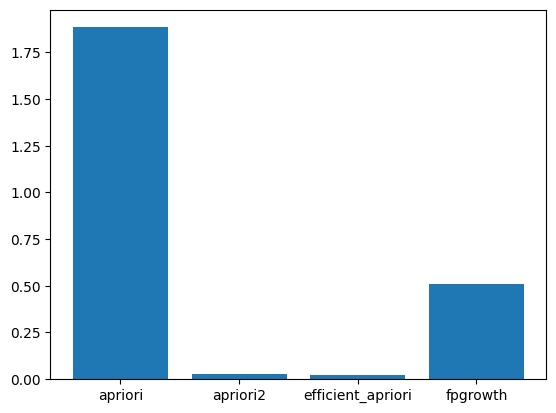

In [141]:
plt.bar(['apriori', 'apriori2', 'efficient_apriori', 'fpgrowth'], t)